# <center> <font style="color:rgb(100,109,254)">  Static Background Subtraction  </font> </center>

Simple background subtraction or foreground extraction is a simple yet effective technique to extract objects from an image/video.

So consider a highway in which there are cars going about, so say you want to segment out each car, one easy way to do is with background subtraction in which you take a picture of the highway with the cars (called foreground image) then you also have an image saved in which the highway does not contain any cars (background image) and then you subtract the background image from the foreground and you get the segmented mask of the cars.


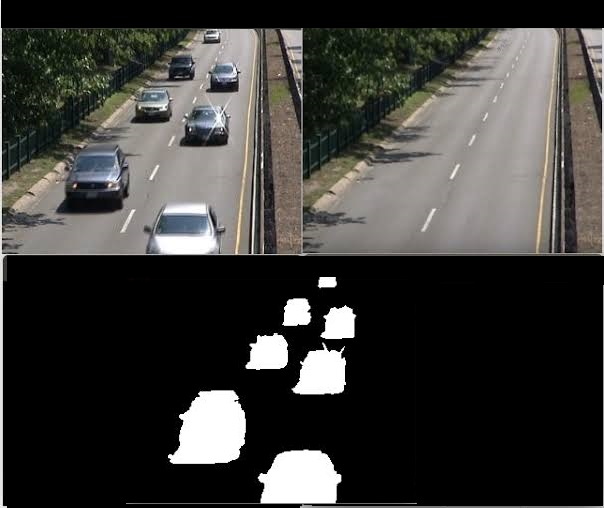

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)"> Custom Background Subtraction   </font>
Now lets write some code to do exactly the above get a segmented mask, so we are gonna try to segment a hand from an image.

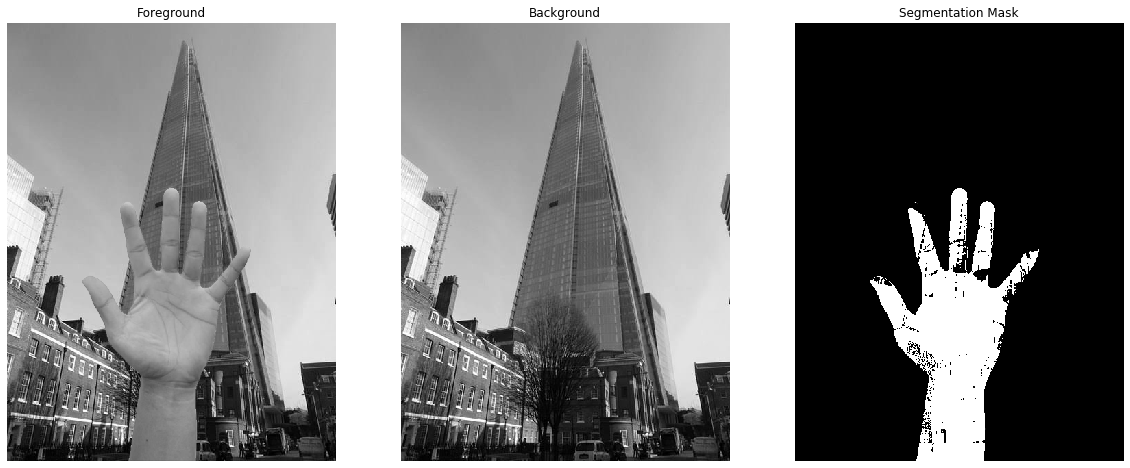

In [7]:
# load the background and foreground image
imb = cv2.imread('media/M4/back.png',0)
imf = cv2.imread('media/M4/fore.png',0)


# specify a filtering threshold
filterthresh = 25

# convert to int64 so the negative values don't get destroyed
imf = np.int64(imf)
imb = np.int64(imb)

# perform the subtraction
img = imf - imb

# convert the negative values to positive
img = abs(img)

# Filter the image based on threshold
# Those pixels which are below the threshold are made 0 cause they are noise, and those above threshold are made 255 cause they 
# are foreground 
img[img < filterthresh] = 0
img[img > filterthresh] = 255

# convert the image back to uint8
img = np.uint8(img)


plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(imf,cmap='gray');plt.title("Foreground");plt.axis('off')
plt.subplot(132);plt.imshow(imb,cmap='gray');plt.title("Background");plt.axis('off');
plt.subplot(133);plt.imshow(img, cmap='gray');plt.title("Segmentation Mask");plt.axis('off');

**Note: The threshold value above should be carefully adjusted for your individual task**

## <font style="color:rgb(134,19,348)">Improving Segmentation with Color information    </font>
We have successfully extracted our segmented mask, we can further improve this mask by subtracting color images instead of gray scale images, this way we will perform subtraction on all three channels instead of one and that way we will get much better results. 

The intuition is simple suppose your target object is in blue color of intensity 150 and the background is in red with the same intensity, so in gray scale there will be hardly any difference between them, this is why with color subtraction you get much better results.

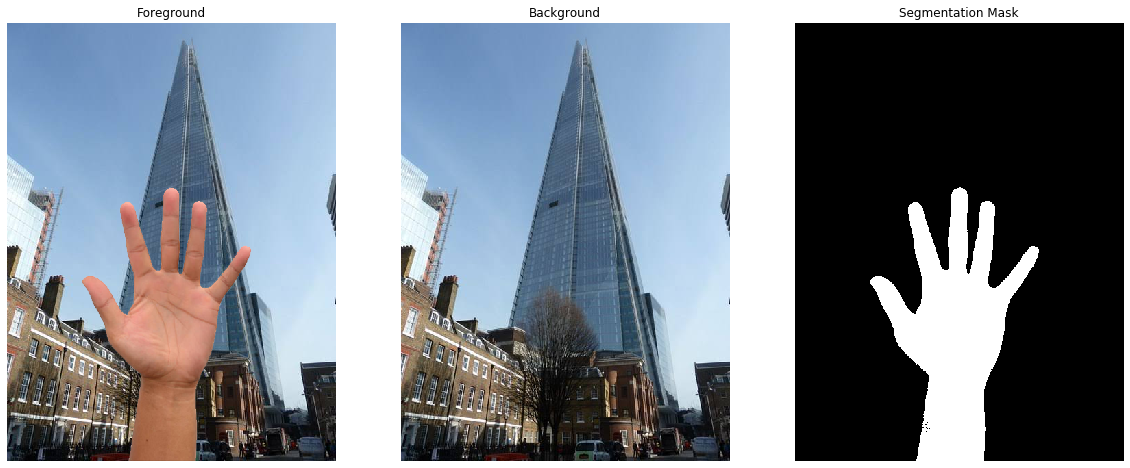

In [8]:
# load the background and foreground image
imb = cv2.imread('media/M4/back.png',1)
imf = cv2.imread('media/M4/fore.png',1)


# specify a filtering threshold
filterthresh = 25

# convert to int64 so the negative values don't get destroyed
imf = np.int64(imf)
imb = np.int64(imb)

# perform the subtraction
img = imf - imb

# convert the negative values to positive
img = abs(img)

# Filter the image based on threshold
# Those pixels which are below the threshold are made 0 cause they are noise, and those above threshold are made 255 cause they 
# are foreground 
img[img < filterthresh] = 0
img[img > filterthresh] = 255

# convert the image back to uint8
img = np.uint8(img)

# convert back to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold to get a binary black and white image
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)


plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(imf[:,:,::-1]);plt.title("Foreground");plt.axis('off')
plt.subplot(132);plt.imshow(imb[:,:,::-1]);plt.title("Background");plt.axis('off');
plt.subplot(133);plt.imshow(img,cmap='gray');plt.title("Segmentation Mask");plt.axis('off');

## <font style="color:rgb(134,19,348)">Background Subtraction on real world images: </font>
Now the above was an easy example, in real world images there will be noise which you would have to get rid of from morphological operations and a good selection of threshold. Here lets segment a hand picture that I took from my laptop.

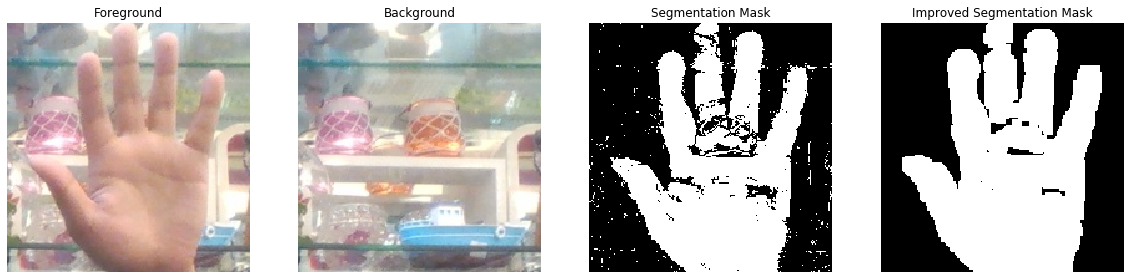

In [9]:
# load the background and foreground image
imb = cv2.imread('media/M4/thehandback.jpg',1)
imf = cv2.imread('media/M4/thehandfront.jpg',1)


# specify a filtering threshold
filterthresh = 23

# convert to int64 so the negative values don't get destroyed
imf = np.int64(imf)
imb = np.int64(imb)

# perform the subtraction
img = imf - imb

# convert the negative values to positive
img = abs(img)

# Filter the image based on threshold
# Those pixels which are below the threshold are made 0 cause they are noise, and those above threshold are made 255 cause they 
# are foreground 
img[img < filterthresh] = 0
img[img > filterthresh] = 255

# convert the image back to uint8
img = np.uint8(img)

# convert back to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold to get a binary black and white image
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)

img_improved = img.copy()

# Improve the image by some morphological operations.
img_improved = cv2.erode(img_improved,None,iterations = 1)
img_improved = cv2.dilate(img_improved,None,iterations = 3)


plt.figure(figsize=[20,20])
plt.subplot(141);plt.imshow(imf[:,:,::-1]);plt.title("Foreground");plt.axis('off')
plt.subplot(142);plt.imshow(imb[:,:,::-1]);plt.title("Background");plt.axis('off');
plt.subplot(143);plt.imshow(img,cmap='gray');plt.title("Segmentation Mask");plt.axis('off');
plt.subplot(144);plt.imshow(img_improved,cmap='gray');plt.title("Improved Segmentation Mask");plt.axis('off');